# Influenza Virus Sequence Analysis

목차
- Biopython 설치
- Download Influenza Virus Sequence

## Biopython 설치
pip로 biopython을 설치합니다.
```shell
pip install biopython
```

In [ ]:
pip install biopython

설치가 잘 되었는지 확인하기 위해 아래와 같이 타이핑 합니다.
```python
import Bio
print(Bio.__version__)
```

In [5]:
import Bio
print(Bio.__version__)

1.81


## Download Influenza Virus Sequence
고른 influenza virus amino acids 서열을 받아서 파일로 저장합시다.

In [9]:
from Bio import Entrez


def download_amino_acid_sequence(accession_id: str):
    Entrez.email = "your@email.mail"
    result_filepath = f"../data/{accession_id}.fasta"
    with open(result_filepath, "w") as handle_write:
        handle = Entrez.efetch(
            db="protein", id=accession_id, rettype="fasta", retmode="text"
        )
        record = handle.read()
        handle.close()
        handle_write.write(record)
        print(f"Downloaded {accession_id} to {result_filepath}")


def main():
    accession_id_list = [
        "YP_308875.1",
        "YP_529486.1",
        "YP_009121768.1",
        "YP_163735.1",
        "YP_009118482",
    ]
    for accession_id in accession_id_list:
        download_amino_acid_sequence(accession_id)


if __name__ == "__main__":
    main()


Downloaded YP_308875.1 to ../data/YP_308875.1.fasta
Downloaded YP_529486.1 to ../data/YP_529486.1.fasta
Downloaded YP_009121768.1 to ../data/YP_009121768.1.fasta
Downloaded YP_163735.1 to ../data/YP_163735.1.fasta
Downloaded YP_009118482 to ../data/YP_009118482.fasta


## Merge FASTA files
다운 받았던 여러개의 fasta 파일을 여러개의 record를 담고 있는 하나의 fasta 파일로 저장합시다.

In [11]:
def merge(accession_id_list):
    with open("../data/all.fasta", "w") as handle_write:
        for accession_id in accession_id_list:
            with open(f"../data/{accession_id}.fasta", "r") as handle_read:
                handle_write.write(handle_read.read())

def main():
    accession_id_list = [
        "YP_308875.1",
        "YP_529486.1",
        "YP_009121768.1",
        "YP_163735.1",
        "YP_009118482",
    ]
    merge(accession_id_list)

if __name__ == "__main__":
    main()


## Run Multiple Sequence Alignment
MSA tool 중 하나인 MUSCLE로 MSA를 수행해보겠습니다.  
변수 muscle_exe에 다운로드 한 muscle 경로를 잘 붙여 주고 muscle을 수행합니다.

In [35]:
from Bio.Align.Applications import MuscleCommandline
import os


def run_muscle(in_file, out_file):
    pwd = %pwd
    muscle_exe = os.path.dirname(pwd) + r"\bin\muscle3.8.31_i86win32.exe"
    in_file = "../data/all.fasta"
    out_file = "../data/all.aln"

    muscle_cline = MuscleCommandline(muscle_exe, input=in_file, out=out_file)
    print(muscle_cline)
    stdout, stderr = muscle_cline()


def main():
    in_file = "../data/all.fasta"
    out_file = "../data/all.aln"
    run_muscle(in_file, out_file)


if __name__ == "__main__":
    main()


c:\Users\kenne\OneDrive\Ken\Lecture\2023_진주외고\2023-Influenza-Analysis\bin\muscle3.8.31_i86win32.exe -in ../data/all.fasta -out ../data/all.aln


## Draw WebLogo

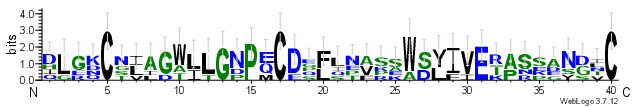

In [65]:
from Bio.Data import IUPACData
from Bio.Seq import Seq
from Bio import motifs

instance = [
    Seq("DGENCTLIDALLGDPQCDGFQNAKKWDLFVERASKAYSNC"),
    Seq("DLGQCGLLGTITGPPQCDQFLEFSAADLIIERAREGSDVC"),
    Seq("ILRDCSVAGWLLGNPMCDEFINVPEWSYIVEKASPANDLC"),
    Seq("HLGKCNIAGWILGNPECESLSTASSWSYIVETPSSDNGTC"),
    Seq("QLGKCNIAGWLLGNPECDPLLPVRSWSYIVETPNSENGIC")
]
m = motifs.create(instances=instance, alphabet=IUPACData.protein_letters)
# print(m.counts)

motifs.Motif.weblogo(m, "../data/logo.test.png")

from IPython.display import Image
Image("../data/logo.test.png")


## Build a newick tree from MSA & Draw Phylogenetic Tree

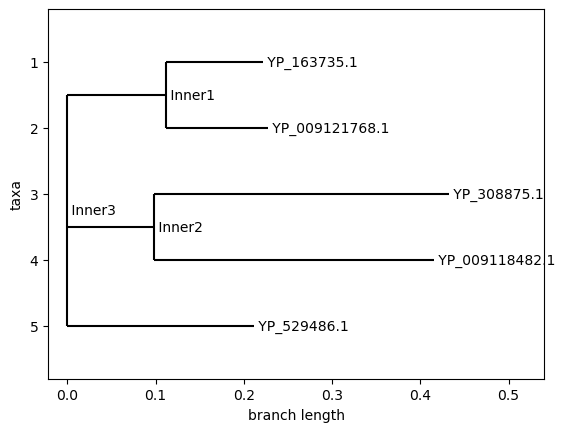

In [72]:
from Bio import AlignIO
from Bio.Phylo import TreeConstruction
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import Phylo
import matplotlib.pyplot as plt


def muscle_to_newick(input_file, output_file):
    # Load the alignment
    alignment = AlignIO.read(input_file, "fasta")

    # Calculate distance matrix
    calculator = DistanceCalculator("identity")

    # Build the tree
    constructor = TreeConstruction.DistanceTreeConstructor(calculator)
    tree = constructor.build_tree(alignment)

    # Save the tree in Newick format
    Phylo.write(tree, output_file, "newick")


def draw_and_save_tree_from_newick(newick_file, output_image):
    # Parse the Newick file
    tree = Phylo.read(newick_file, "newick")

    # Draw the tree
    Phylo.draw(tree, do_show=False)
    plt.savefig(output_image)
    plt.close()

    # Show figure on jupyter notebook
    Phylo.draw(tree)



if __name__ == "__main__":
    input_file = "../data/all.aln"
    newick_file = "../data/all.nwk"

    muscle_to_newick(input_file, newick_file)
    draw_and_save_tree_from_newick(newick_file, "../data/tree.png")
